# To Build Machine learning approach to predict the CTR ('click_rate') of an email compaign....

In [1]:
# import all required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# fetch data from system
t_data=pd.read_csv('train_F3fUq2S.csv')

In [3]:
test_data=pd.read_csv('test_Bk2wfZ3.csv')

In [4]:
# Analyze Data carefully
t_data.head(5)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [5]:
test_data.head(5)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [6]:
t_data.shape

(1888, 22)

In [7]:
test_data.shape

(762, 21)

In [8]:
train_data=pd.concat([t_data,test_data])

In [9]:
train_data.shape

(2650, 22)

In [10]:
train_data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


# from above its observed that train & test data splited so prediction of "train_dataset" can give idea how better is its predicting y_pred"


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 0 to 761
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         2650 non-null   int64  
 1   sender              2650 non-null   int64  
 2   subject_len         2650 non-null   int64  
 3   body_len            2650 non-null   int64  
 4   mean_paragraph_len  2650 non-null   int64  
 5   day_of_week         2650 non-null   int64  
 6   is_weekend          2650 non-null   int64  
 7   times_of_day        2650 non-null   object 
 8   category            2650 non-null   int64  
 9   product             2650 non-null   int64  
 10  no_of_CTA           2650 non-null   int64  
 11  mean_CTA_len        2650 non-null   int64  
 12  is_image            2650 non-null   int64  
 13  is_personalised     2650 non-null   int64  
 14  is_quote            2650 non-null   int64  
 15  is_timer            2650 non-null   int64  
 16  is_emot

In [12]:
# from above obsrvation i know there is string type data 

In [13]:
# importing label_encoder 
from sklearn.preprocessing import LabelEncoder

In [14]:
LE=LabelEncoder()

In [15]:
train_data['times_of_day']=LE.fit_transform(train_data['times_of_day'])

In [16]:
train_data.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,...,2650.000000,2650.000000,2650.000000,2650.0,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,1888.000000
mean,1325.500000,4.353585,86.321887,14185.344151,34.648679,2.834717,0.202642,0.536981,9.846415,17.625283,...,0.919245,0.052830,0.843019,0.0,0.232453,0.037358,34.675472,0.112830,11.638491,0.041888
std,765.133431,3.236710,30.265757,7283.856366,27.796352,1.771125,0.402043,0.847548,5.306196,12.203647,...,0.869499,0.223737,1.032265,0.0,0.735963,0.189674,497.222896,0.316445,2.973373,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,663.250000,3.000000,68.000000,9596.000000,21.000000,1.000000,0.000000,0.000000,6.000000,9.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,1325.500000,3.000000,83.000000,12699.000000,28.000000,3.000000,0.000000,0.000000,10.000000,12.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1987.750000,3.000000,98.000000,17279.000000,40.000000,4.000000,0.000000,1.000000,15.000000,26.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,2650.000000,15.000000,265.000000,44491.000000,498.000000,6.000000,1.000000,2.000000,15.000000,44.000000,...,6.000000,1.000000,6.000000,0.0,17.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [17]:
t_data=t_data.replace(t_data['sender']>3,np.nan)

In [18]:
t_data=t_data.replace(t_data['mean_paragraph_len']>50,np.nan)

In [19]:
t_data=t_data.replace(t_data['is_price']>2,np.nan)

In [20]:
t_data=t_data.replace(t_data['is_price']>100,np.nan)

array([[<AxesSubplot:title={'center':'campaign_id'}>,
        <AxesSubplot:title={'center':'sender'}>,
        <AxesSubplot:title={'center':'subject_len'}>,
        <AxesSubplot:title={'center':'body_len'}>,
        <AxesSubplot:title={'center':'mean_paragraph_len'}>],
       [<AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'is_weekend'}>,
        <AxesSubplot:title={'center':'times_of_day'}>,
        <AxesSubplot:title={'center':'category'}>,
        <AxesSubplot:title={'center':'product'}>],
       [<AxesSubplot:title={'center':'no_of_CTA'}>,
        <AxesSubplot:title={'center':'mean_CTA_len'}>,
        <AxesSubplot:title={'center':'is_image'}>,
        <AxesSubplot:title={'center':'is_personalised'}>,
        <AxesSubplot:title={'center':'is_quote'}>],
       [<AxesSubplot:title={'center':'is_timer'}>,
        <AxesSubplot:title={'center':'is_emoticons'}>,
        <AxesSubplot:title={'center':'is_discount'}>,
        <AxesSubplot:title={'center':'

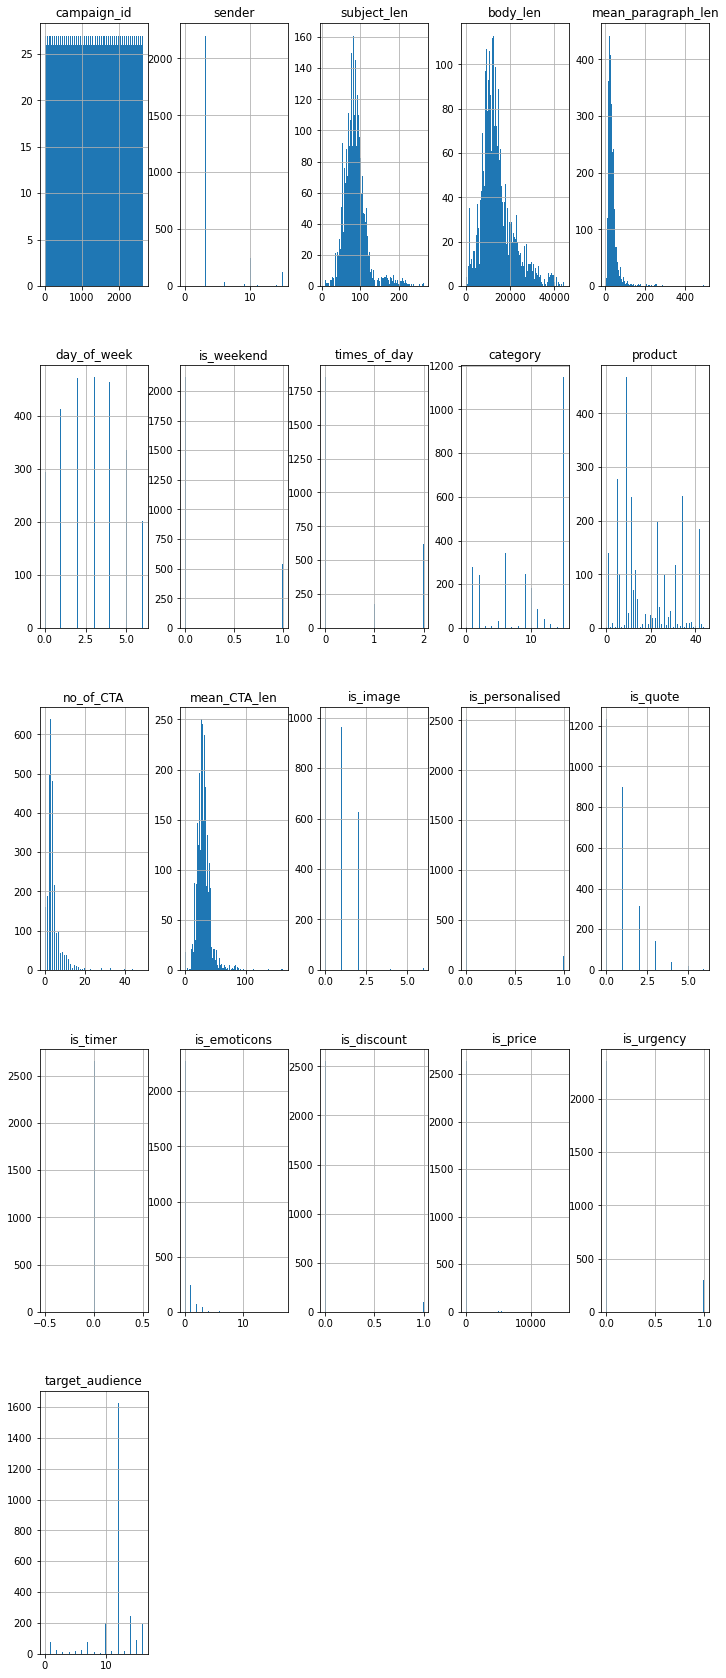

In [21]:
c=list(train_data)[0:-1]
train_data[c].hist(bins=100,figsize=(12,30))

In [22]:
# outliers treatment

In [23]:
# c=list(train_data)[0:-1]
# train_data[c].plot(figsize=(50,100))

# Before removal

In [24]:
def plotvariable(df,variable):
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,2,1)
    plt.hist(df[variable],alpha=0.5)
    
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    plt.show()

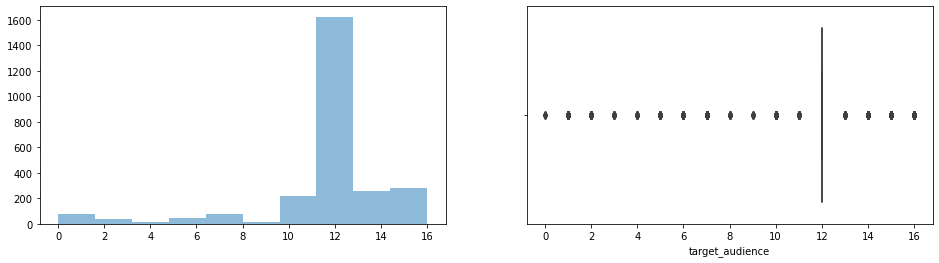

In [25]:
plotvariable(train_data,'target_audience')

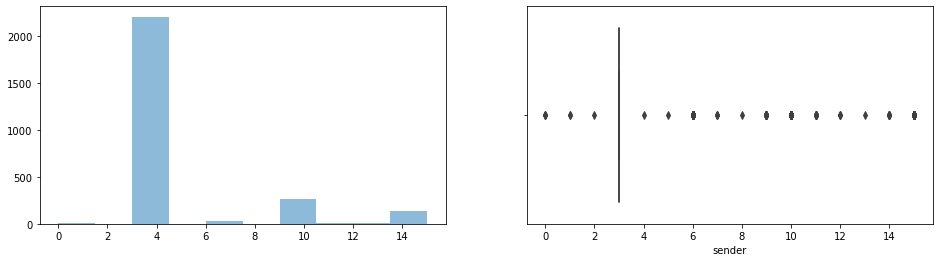

In [26]:
plotvariable(train_data,'sender')

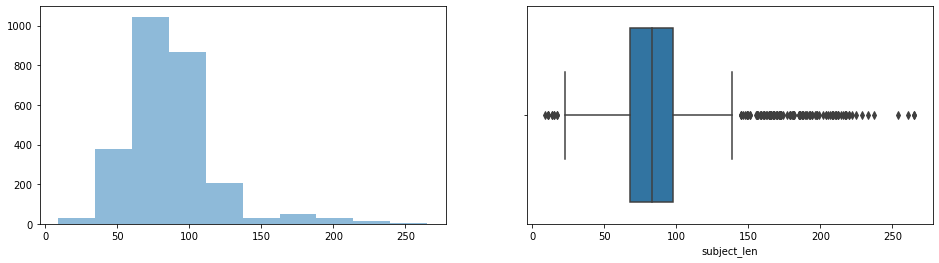

In [27]:
plotvariable(train_data,'subject_len')

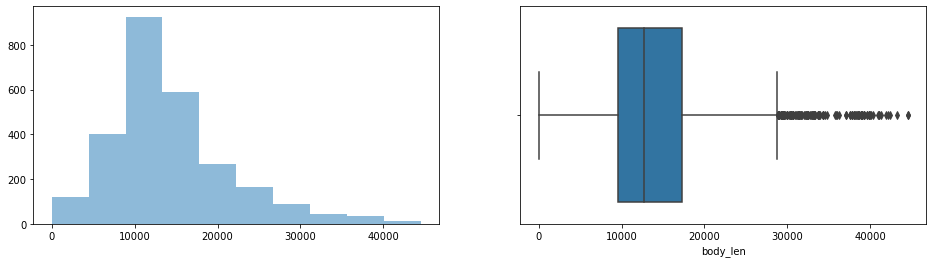

In [28]:
plotvariable(train_data,'body_len')

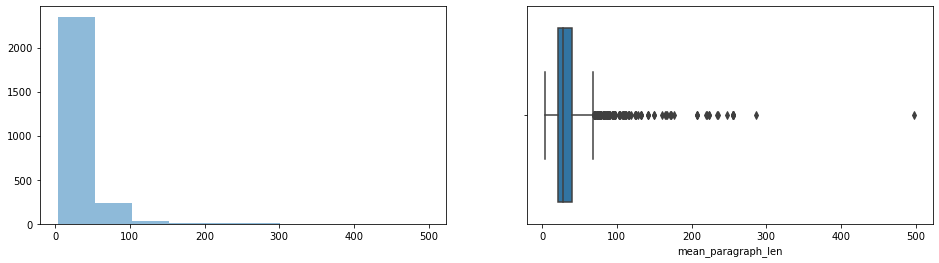

In [29]:
plotvariable(train_data,'mean_paragraph_len')

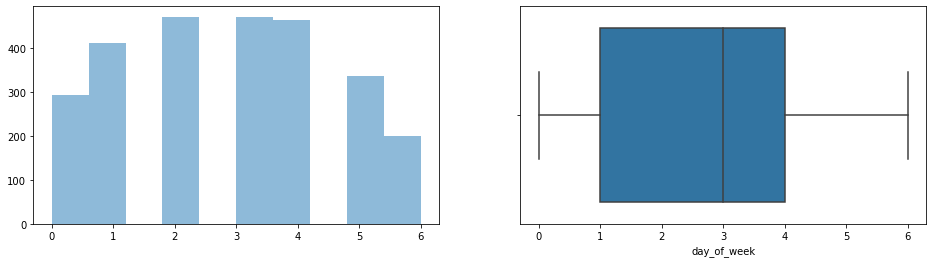

In [30]:
plotvariable(train_data,'day_of_week')

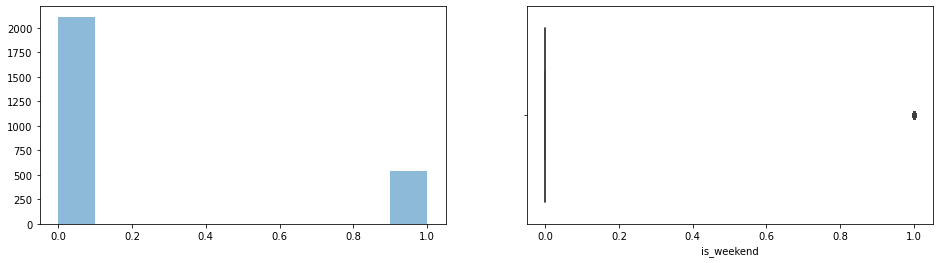

In [31]:
plotvariable(train_data,'is_weekend')

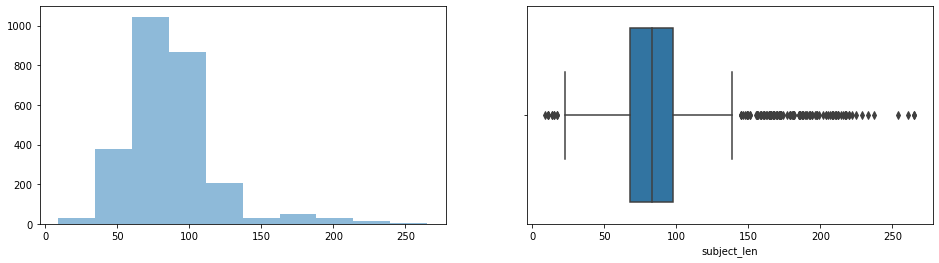

In [32]:
plotvariable(train_data,'subject_len')

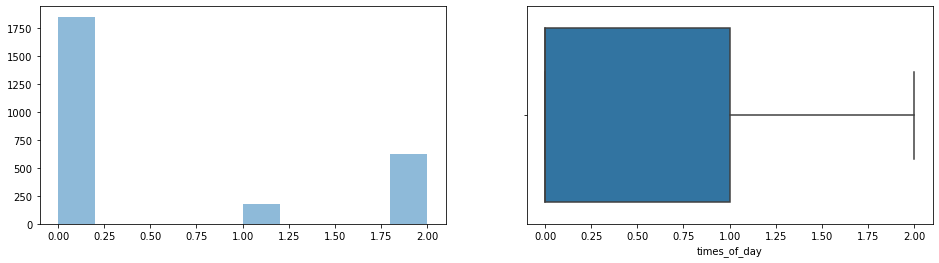

In [33]:
plotvariable(train_data,'times_of_day')

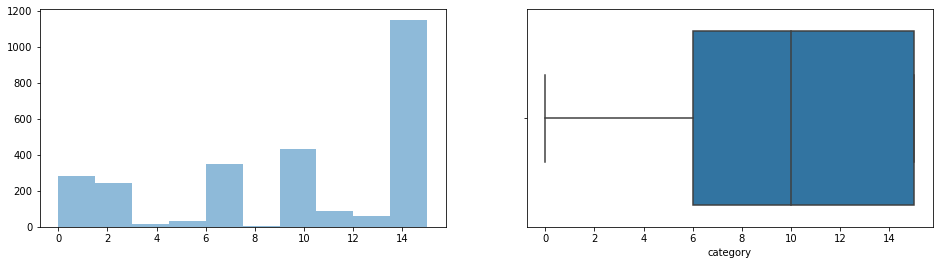

In [34]:
plotvariable(train_data,'category')

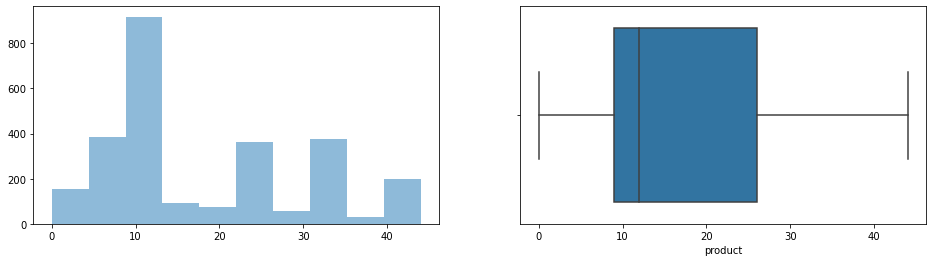

In [35]:
plotvariable(train_data,'product')

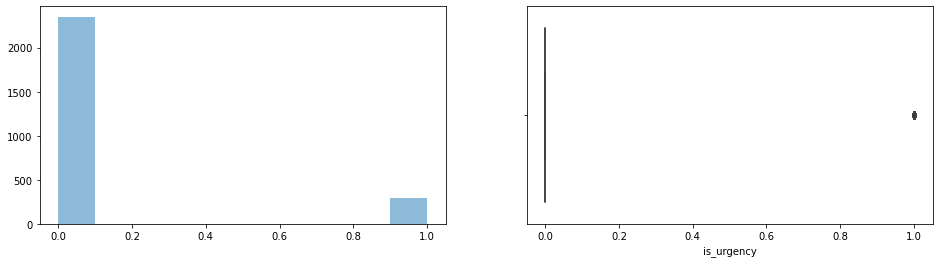

In [36]:
plotvariable(train_data,'is_urgency')

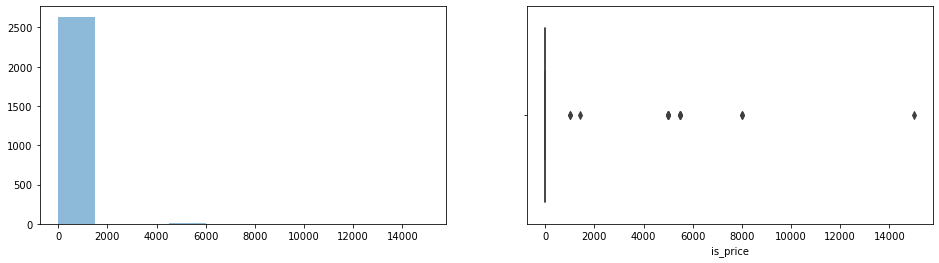

In [37]:
plotvariable(train_data,'is_price')

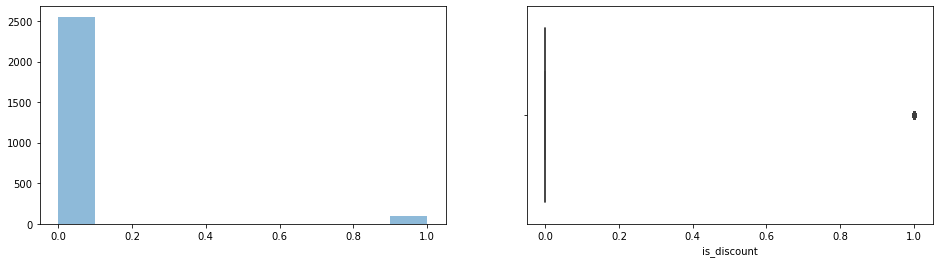

In [38]:
plotvariable(train_data,'is_discount')

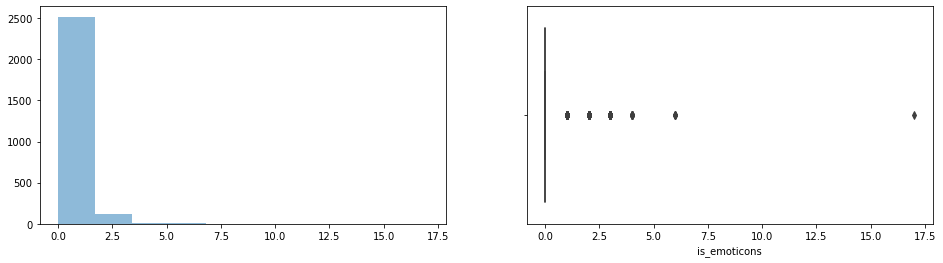

In [39]:
plotvariable(train_data,'is_emoticons')

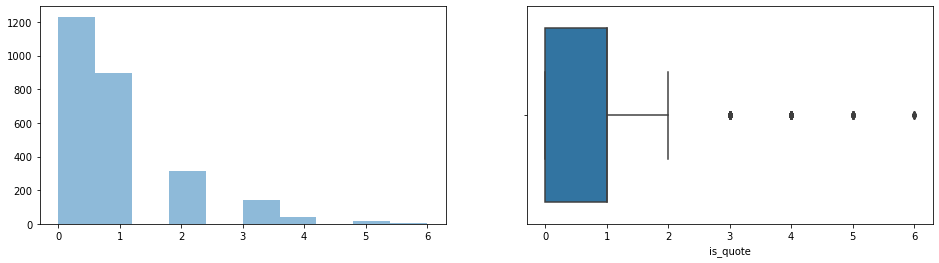

In [40]:
plotvariable(train_data,'is_quote')

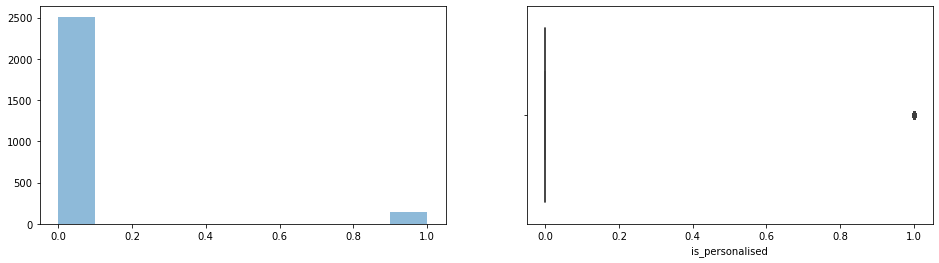

In [41]:
plotvariable(train_data,'is_personalised')

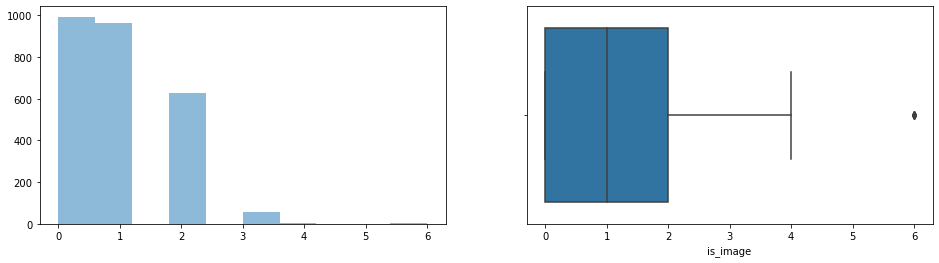

In [42]:
plotvariable(train_data,'is_image')

In [43]:
def outliers(df, ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    return lower_bound,upper_bound

In [44]:
lower_bound,upper_bound=outliers(train_data,'is_image')

In [45]:
print('upper_limit is',upper_bound)
print('lower_limit is',lower_bound)

upper_limit is 5.0
lower_limit is -3.0


In [46]:
train_data['is_image']=np.where(train_data['is_image']>upper_bound,upper_bound,
                        np.where(train_data['is_image']<lower_bound,lower_bound,train_data['is_image']))

In [47]:
train_data['is_personalised']=np.where(train_data['is_personalised']>upper_bound,upper_bound,
                        np.where(train_data['is_personalised']<lower_bound,lower_bound,train_data['is_personalised']))

In [48]:
train_data['is_quote']=np.where(train_data['is_quote']>upper_bound,upper_bound,
                        np.where(train_data['is_quote']<lower_bound,lower_bound,train_data['is_quote']))

In [49]:
train_data['is_emoticons']=np.where(train_data['is_emoticons']>upper_bound,upper_bound,
                        np.where(train_data['is_emoticons']<lower_bound,lower_bound,train_data['is_emoticons']))

In [50]:
train_data['is_discount']=np.where(train_data['is_discount']>upper_bound,upper_bound,
                        np.where(train_data['is_discount']<lower_bound,lower_bound,train_data['is_discount']))

In [51]:
train_data['is_price']=np.where(train_data['is_price']>upper_bound,upper_bound,
                        np.where(train_data['is_price']<lower_bound,lower_bound,train_data['is_price']))

In [52]:
train_data['is_urgency']=np.where(train_data['is_urgency']>upper_bound,upper_bound,
                        np.where(train_data['is_urgency']<lower_bound,lower_bound,train_data['is_urgency']))

In [53]:
train_data['is_weekend']=np.where(train_data['is_weekend']>upper_bound,upper_bound,
                        np.where(train_data['is_weekend']<lower_bound,lower_bound,train_data['is_weekend']))

In [54]:
train_data['sender']=np.where(train_data['sender']>upper_bound,upper_bound,
                        np.where(train_data['sender']<lower_bound,lower_bound,train_data['sender']))

In [55]:
train_data['click_rate'].value_counts()

0.000000    39
0.500000     5
0.083333     4
0.033333     3
0.008403     3
            ..
0.019727     1
0.002228     1
0.013577     1
0.011013     1
0.003644     1
Name: click_rate, Length: 1810, dtype: int64

In [56]:
train_data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3.0,76,10439,39,5,1.0,2,6,26,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,14,0.103079
1,2,3.0,54,2570,256,5,1.0,1,2,11,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,10,0.700000
2,3,3.0,59,12801,16,5,1.0,2,2,11,...,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,16,0.002769
3,4,3.0,74,11037,30,4,0.0,0,15,9,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,10,0.010868
4,5,3.0,80,10011,27,5,1.0,2,6,26,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,14,0.142826


In [57]:
train_data['click_rate'].value_counts()

0.000000    39
0.500000     5
0.083333     4
0.033333     3
0.008403     3
            ..
0.019727     1
0.002228     1
0.013577     1
0.011013     1
0.003644     1
Name: click_rate, Length: 1810, dtype: int64

# After removal

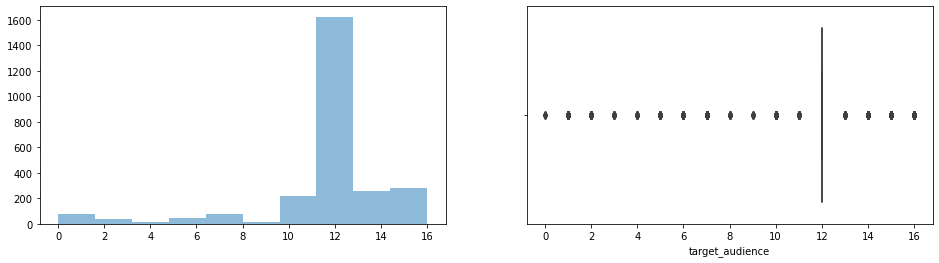

In [58]:
plotvariable(train_data,'target_audience')

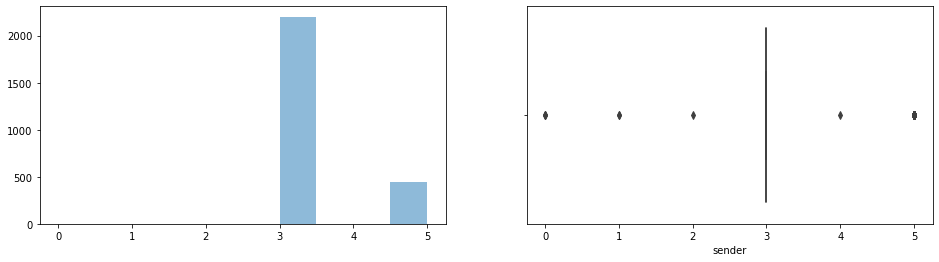

In [59]:
plotvariable(train_data,'sender')

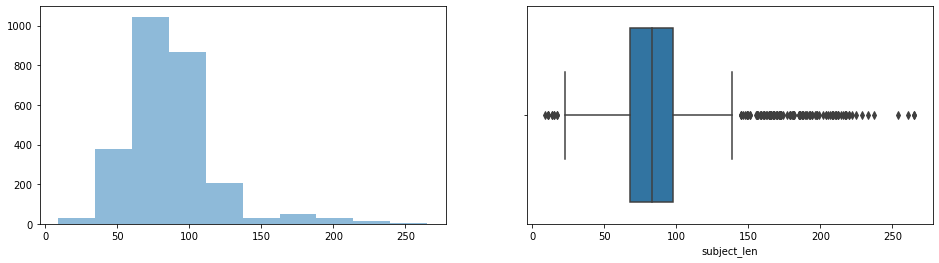

In [60]:
plotvariable(train_data,'subject_len')

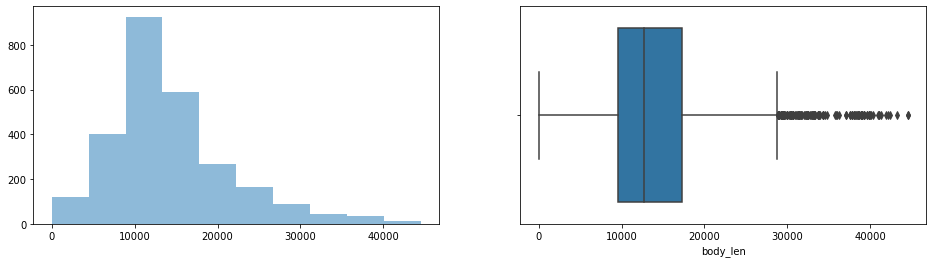

In [61]:
plotvariable(train_data,'body_len')

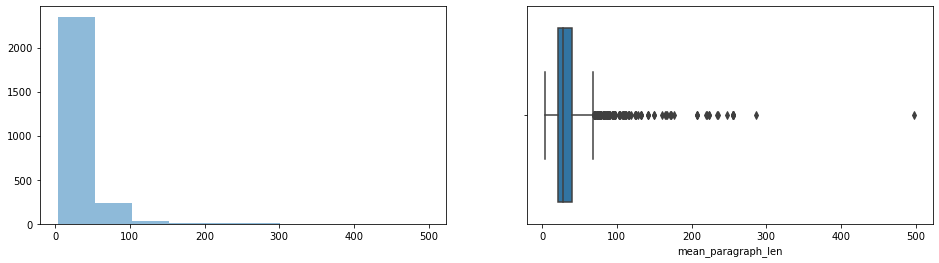

In [62]:
plotvariable(train_data,'mean_paragraph_len')

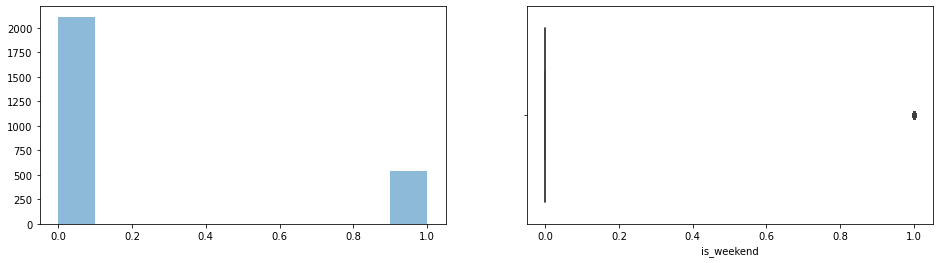

In [63]:
plotvariable(train_data,'is_weekend')

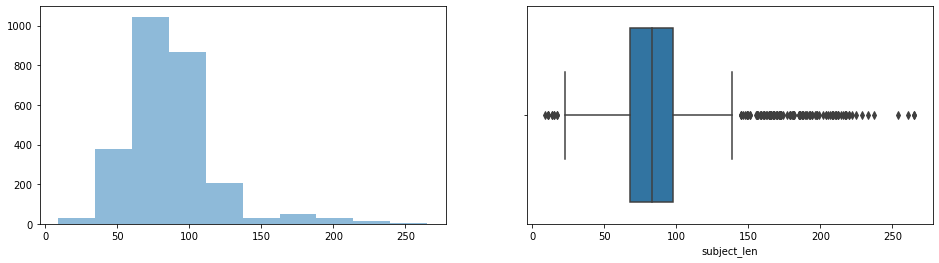

In [64]:
plotvariable(train_data,'subject_len')

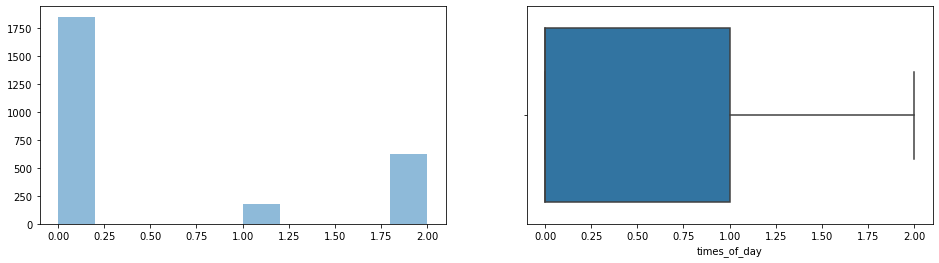

In [65]:
plotvariable(train_data,'times_of_day')

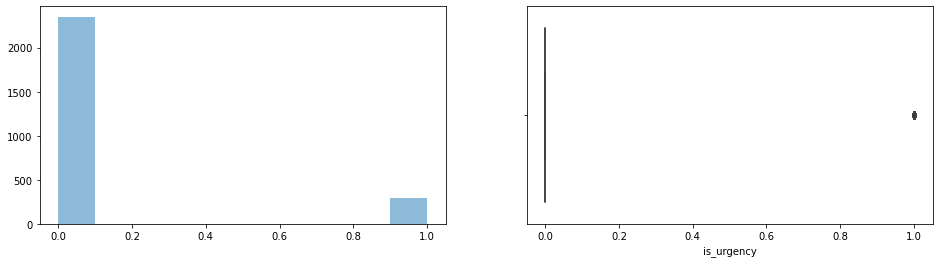

In [66]:
plotvariable(train_data,'is_urgency')

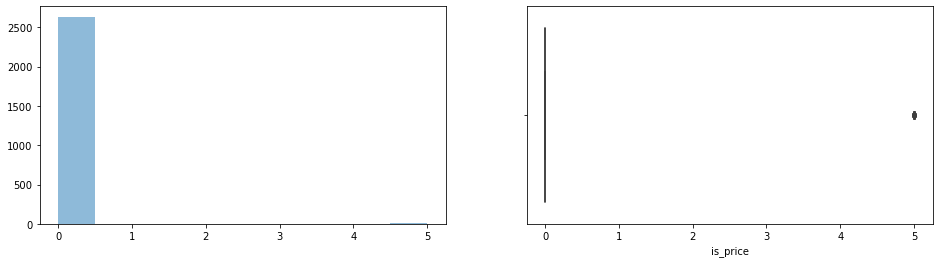

In [67]:
plotvariable(train_data,'is_price')

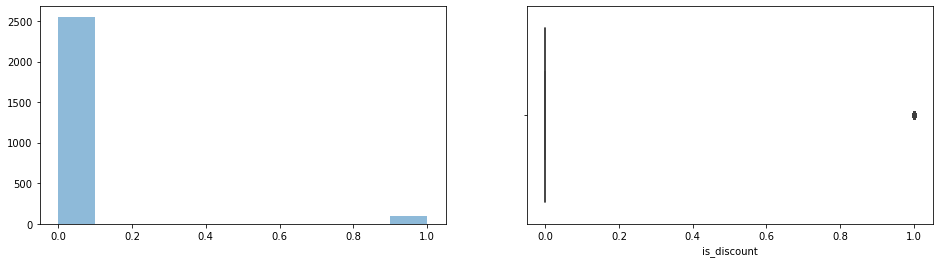

In [68]:
plotvariable(train_data,'is_discount')

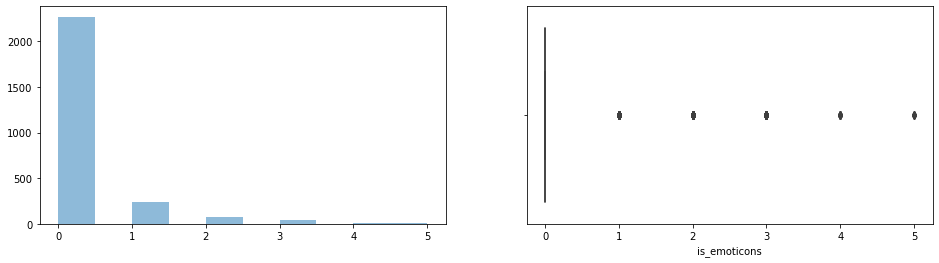

In [69]:
plotvariable(train_data,'is_emoticons')

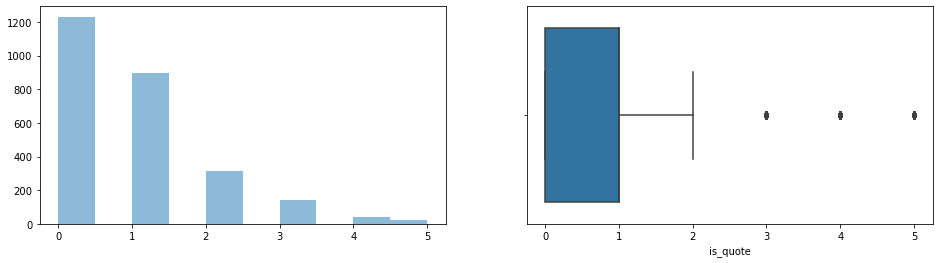

In [70]:
plotvariable(train_data,'is_quote')

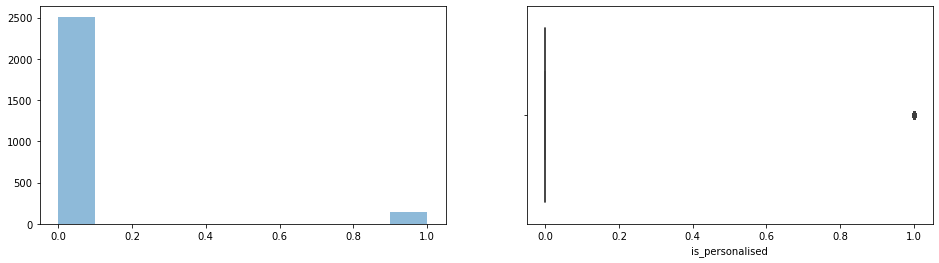

In [71]:
plotvariable(train_data,'is_personalised')

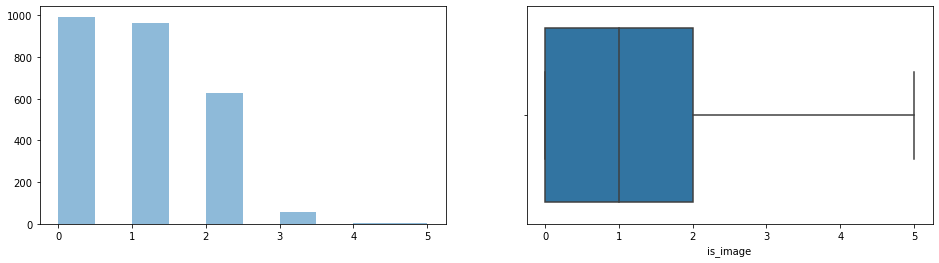

In [72]:
plotvariable(train_data,'is_image')

In [73]:
train_data.shape

(2650, 22)

In [74]:
train_data.corr()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
campaign_id,1.000000,0.246563,-0.027127,0.117420,-0.012131,0.026207,0.038012,0.024641,0.142338,0.136864,...,0.001895,0.101551,0.010502,NaN,-0.037837,-0.013733,-0.037044,-0.027777,-0.060257,0.053315
sender,0.246563,1.000000,-0.098448,0.181636,0.076462,-0.056873,-0.073785,0.028406,0.179909,0.071305,...,-0.108547,0.171549,0.023759,NaN,-0.087942,-0.022446,-0.047374,-0.047699,-0.095261,-0.015154
subject_len,-0.027127,-0.098448,1.000000,0.413432,-0.203044,-0.048937,-0.052177,0.015731,0.022331,-0.020213,...,-0.027524,-0.278186,0.108972,NaN,0.094095,0.118047,0.024450,0.107280,-0.025382,-0.180143
body_len,0.117420,0.181636,0.413432,1.000000,-0.478160,-0.076340,-0.080141,0.095318,0.028715,-0.034605,...,-0.025449,-0.217294,0.190295,NaN,-0.035802,0.048484,-0.008255,0.038375,-0.093880,-0.247866
mean_paragraph_len,-0.012131,0.076462,-0.203044,-0.478160,1.000000,-0.020135,-0.013456,-0.043922,0.051148,-0.062919,...,-0.091945,0.163053,-0.089636,NaN,-0.033626,-0.027081,0.013601,-0.043130,-0.083364,0.178042
day_of_week,0.026207,-0.056873,-0.048937,-0.076340,-0.020135,1.000000,0.722991,0.167536,-0.056488,-0.000002,...,0.014078,-0.057026,-0.033317,NaN,0.002947,-0.037799,0.002162,0.026551,0.083415,0.086372
is_weekend,0.038012,-0.073785,-0.052177,-0.080141,-0.013456,0.722991,1.000000,0.205662,-0.059727,-0.015602,...,0.037867,-0.056109,-0.037196,NaN,-0.000551,-0.039907,-0.028749,0.004184,0.049620,0.114138
times_of_day,0.024641,0.028406,0.015731,0.095318,-0.043922,0.167536,0.205662,1.000000,-0.199480,0.072565,...,0.002148,-0.070029,0.025542,NaN,-0.077726,-0.049692,-0.006296,-0.075383,-0.028248,0.125569
category,0.142338,0.179909,0.022331,0.028715,0.051148,-0.056488,-0.059727,-0.199480,1.000000,0.019923,...,-0.033170,0.128305,-0.076352,NaN,0.107489,0.156861,0.063801,0.185010,-0.025629,-0.167756
product,0.136864,0.071305,-0.020213,-0.034605,-0.062919,-0.000002,-0.015602,0.072565,0.019923,1.000000,...,0.037105,0.058270,-0.095862,NaN,0.016550,-0.004714,-0.025811,-0.109675,0.054795,0.121602


In [75]:
# there is one column 'is_timer' having no relation so drop the column

In [76]:
train_data.drop(['is_timer'],axis=1,inplace=True)

In [77]:
train_data.corr()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
campaign_id,1.000000,0.246563,-0.027127,0.117420,-0.012131,0.026207,0.038012,0.024641,0.142338,0.136864,...,0.052578,0.001895,0.101551,0.010502,-0.037837,-0.013733,-0.037044,-0.027777,-0.060257,0.053315
sender,0.246563,1.000000,-0.098448,0.181636,0.076462,-0.056873,-0.073785,0.028406,0.179909,0.071305,...,0.063012,-0.108547,0.171549,0.023759,-0.087942,-0.022446,-0.047374,-0.047699,-0.095261,-0.015154
subject_len,-0.027127,-0.098448,1.000000,0.413432,-0.203044,-0.048937,-0.052177,0.015731,0.022331,-0.020213,...,0.175202,-0.027524,-0.278186,0.108972,0.094095,0.118047,0.024450,0.107280,-0.025382,-0.180143
body_len,0.117420,0.181636,0.413432,1.000000,-0.478160,-0.076340,-0.080141,0.095318,0.028715,-0.034605,...,0.092141,-0.025449,-0.217294,0.190295,-0.035802,0.048484,-0.008255,0.038375,-0.093880,-0.247866
mean_paragraph_len,-0.012131,0.076462,-0.203044,-0.478160,1.000000,-0.020135,-0.013456,-0.043922,0.051148,-0.062919,...,0.034831,-0.091945,0.163053,-0.089636,-0.033626,-0.027081,0.013601,-0.043130,-0.083364,0.178042
day_of_week,0.026207,-0.056873,-0.048937,-0.076340,-0.020135,1.000000,0.722991,0.167536,-0.056488,-0.000002,...,-0.007293,0.014078,-0.057026,-0.033317,0.002947,-0.037799,0.002162,0.026551,0.083415,0.086372
is_weekend,0.038012,-0.073785,-0.052177,-0.080141,-0.013456,0.722991,1.000000,0.205662,-0.059727,-0.015602,...,-0.031990,0.037867,-0.056109,-0.037196,-0.000551,-0.039907,-0.028749,0.004184,0.049620,0.114138
times_of_day,0.024641,0.028406,0.015731,0.095318,-0.043922,0.167536,0.205662,1.000000,-0.199480,0.072565,...,-0.021188,0.002148,-0.070029,0.025542,-0.077726,-0.049692,-0.006296,-0.075383,-0.028248,0.125569
category,0.142338,0.179909,0.022331,0.028715,0.051148,-0.056488,-0.059727,-0.199480,1.000000,0.019923,...,0.135744,-0.033170,0.128305,-0.076352,0.107489,0.156861,0.063801,0.185010,-0.025629,-0.167756
product,0.136864,0.071305,-0.020213,-0.034605,-0.062919,-0.000002,-0.015602,0.072565,0.019923,1.000000,...,0.055545,0.037105,0.058270,-0.095862,0.016550,-0.004714,-0.025811,-0.109675,0.054795,0.121602


In [78]:
train_data.isna().any()

campaign_id           False
sender                False
subject_len           False
body_len              False
mean_paragraph_len    False
day_of_week           False
is_weekend            False
times_of_day          False
category              False
product               False
no_of_CTA             False
mean_CTA_len          False
is_image              False
is_personalised       False
is_quote              False
is_emoticons          False
is_discount           False
is_price              False
is_urgency            False
target_audience       False
click_rate             True
dtype: bool

In [79]:
train_data.isnull().any()

campaign_id           False
sender                False
subject_len           False
body_len              False
mean_paragraph_len    False
day_of_week           False
is_weekend            False
times_of_day          False
category              False
product               False
no_of_CTA             False
mean_CTA_len          False
is_image              False
is_personalised       False
is_quote              False
is_emoticons          False
is_discount           False
is_price              False
is_urgency            False
target_audience       False
click_rate             True
dtype: bool

In [80]:
train_data.fillna(t_data['click_rate'].mean(),inplace=True)

In [81]:
# so there no missing values in above data set, now find correlation..

<AxesSubplot:>

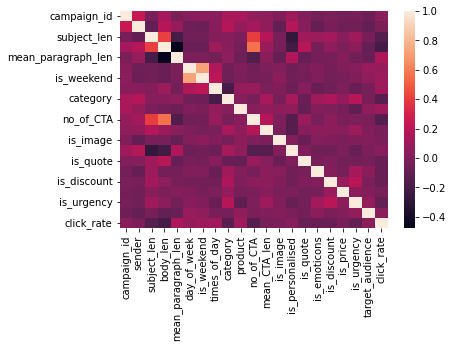

In [82]:
sns.heatmap(train_data.corr())

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x=train_data.drop(['click_rate','campaign_id'],axis=1)
y=train_data['click_rate']

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [86]:
Lr=LinearRegression()

In [87]:
Lr.fit(x_train,y_train)

LinearRegression()

In [88]:
Lr.score(x_train,y_train)

0.10323806904166799

In [89]:
Lr.score(x_test,y_test)

0.11278081801199036

In [90]:
y_pred=Lr.predict(x_test)

In [91]:
y_pred.shape

(795,)

In [92]:
y_pred

array([ 0.03153105,  0.00842779,  0.07831302,  0.04742011,  0.05077832,
        0.05895254,  0.03030766,  0.07606259,  0.04048207,  0.06860893,
        0.06999248,  0.05139594,  0.05074438,  0.0466593 ,  0.04193426,
        0.01667005,  0.06107779,  0.02610148,  0.05312134,  0.05494449,
        0.05115702,  0.01015577,  0.03380634,  0.04003371,  0.05577229,
        0.04232693,  0.03815642,  0.04184636,  0.01061163,  0.05469322,
        0.01206143,  0.00914782,  0.04686404,  0.02610683,  0.02071882,
        0.02266333,  0.01254985,  0.01752978,  0.05261076,  0.01622137,
        0.06697687,  0.04665039,  0.0411796 ,  0.02645915,  0.04762475,
        0.04983475,  0.06355101,  0.03692852,  0.00014197,  0.01378292,
        0.07236957,  0.02674702,  0.03107213,  0.05671206, -0.01412037,
        0.00368884,  0.11798393,  0.02945519,  0.07323949,  0.02184675,
        0.02657951,  0.0173894 ,  0.04295733,  0.04666574,  0.02364792,
       -0.00373527,  0.04143255,  0.04239615,  0.0080863 ,  0.02

In [93]:
LE=LabelEncoder()

In [94]:
t_data['times_of_day']=LE.fit_transform(t_data['times_of_day'])

In [95]:
t_data.drop(['is_timer'],axis=1)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,29,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,22,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,23,1,0,1,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,24,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,31,0,0,1,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,2,2,11,...,22,0,0,1,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,0,2,11,...,27,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,0,15,9,...,28,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,0,2,11,...,27,0,0,0,0,0,0,0,16,0.012014


In [96]:
x_=t_data.drop(['click_rate','campaign_id'],axis=1)

In [97]:
y_=t_data['click_rate']

In [98]:
t_data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [99]:
sample_data=

SyntaxError: invalid syntax (Temp/ipykernel_5376/2986690808.py, line 1)